In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [5]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly" : "Salary"}, axis = 1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Employed, full-time",NaN
3,Canada,Some college/university study without earning ...,NaN,"Student, full-time",NaN
4,Norway,"Secondary school (e.g. American high school, G...",NaN,"Student, full-time",NaN


In [6]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23435 non-null  object 
 1   EdLevel       23435 non-null  object 
 2   YearsCodePro  23345 non-null  object 
 3   Employment    23435 non-null  object 
 4   Salary        23435 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [8]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [9]:
df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                                                                                     17527
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                                 1690
Independent contractor, freelancer, or self-employed                                                                                                                                                                     1616
Employed, part-time                                                                                                                                                                                                       430
Employed, full-time;Student, part-time                                                               

In [10]:
#keep only those data points where user is employed full time
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17527 entries, 374 to 41185
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       17527 non-null  object 
 1   EdLevel       17527 non-null  object 
 2   YearsCodePro  17527 non-null  object 
 3   Salary        17527 non-null  float64
dtypes: float64(1), object(3)
memory usage: 684.6+ KB


In [11]:
df['Country'].value_counts()

Country
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
                                                        ... 
Botswana                                                   1
Barbados                                                   1
Senegal                                                    1
Suriname                                                   1
Mali                                                       1
Name: count, Length: 155, dtype: int64

In [12]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [13]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
Other                                                   5628
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
France                                                   719
Canada                                                   684
Brazil                                                   457
Spain                                                    431
Italy                                                    414
Netherlands                                              406
Australia                                                400
Name: count, dtype: int64

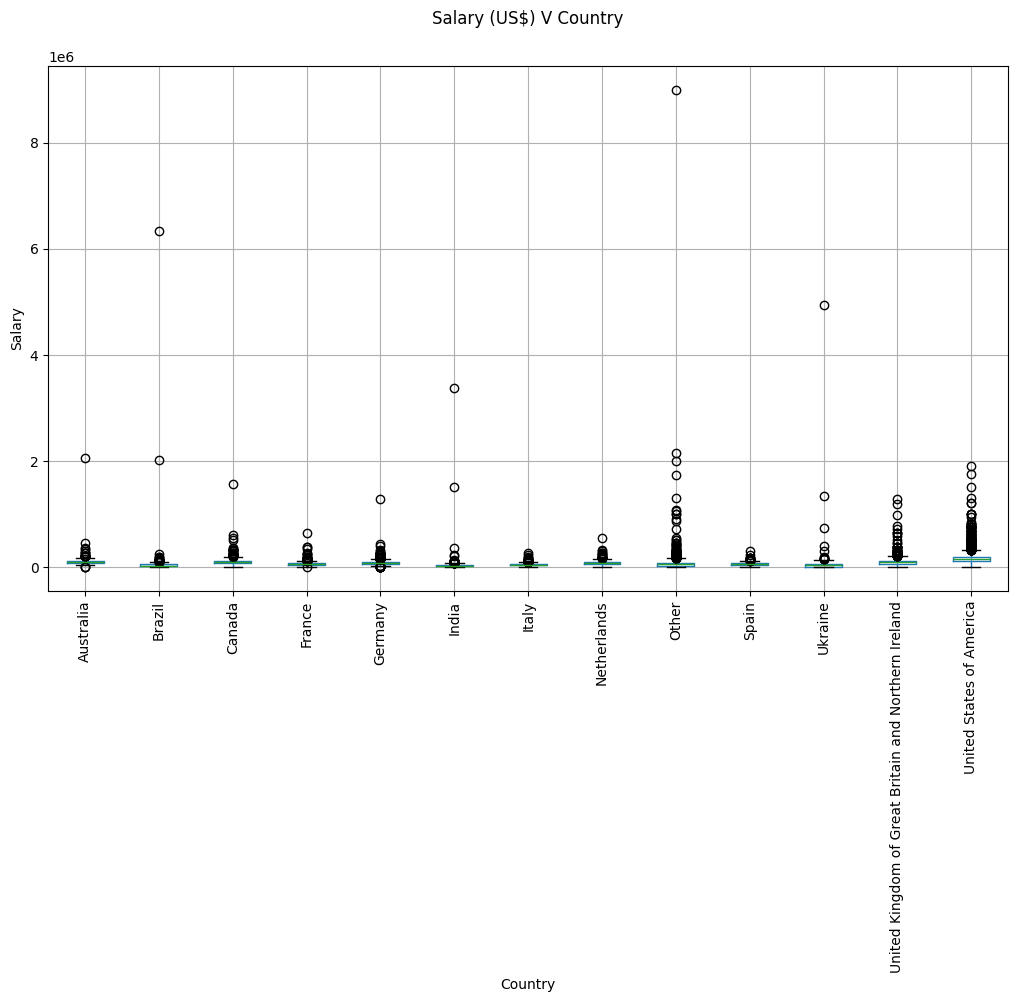

In [14]:
#Salary against country

fig, ax = plt.subplots(1,1, figsize = (12,7))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle('Salary (US$) V Country')
plt.title(' ')
plt.ylabel('Salary')
plt.xticks(rotation = 90)

plt.show() 


In [15]:
#Outliers in salary
df = df[df['Salary'] <= 1000000]
df= df[df['Salary'] >= 10000]
df = df[df['Country'] != 'Other']

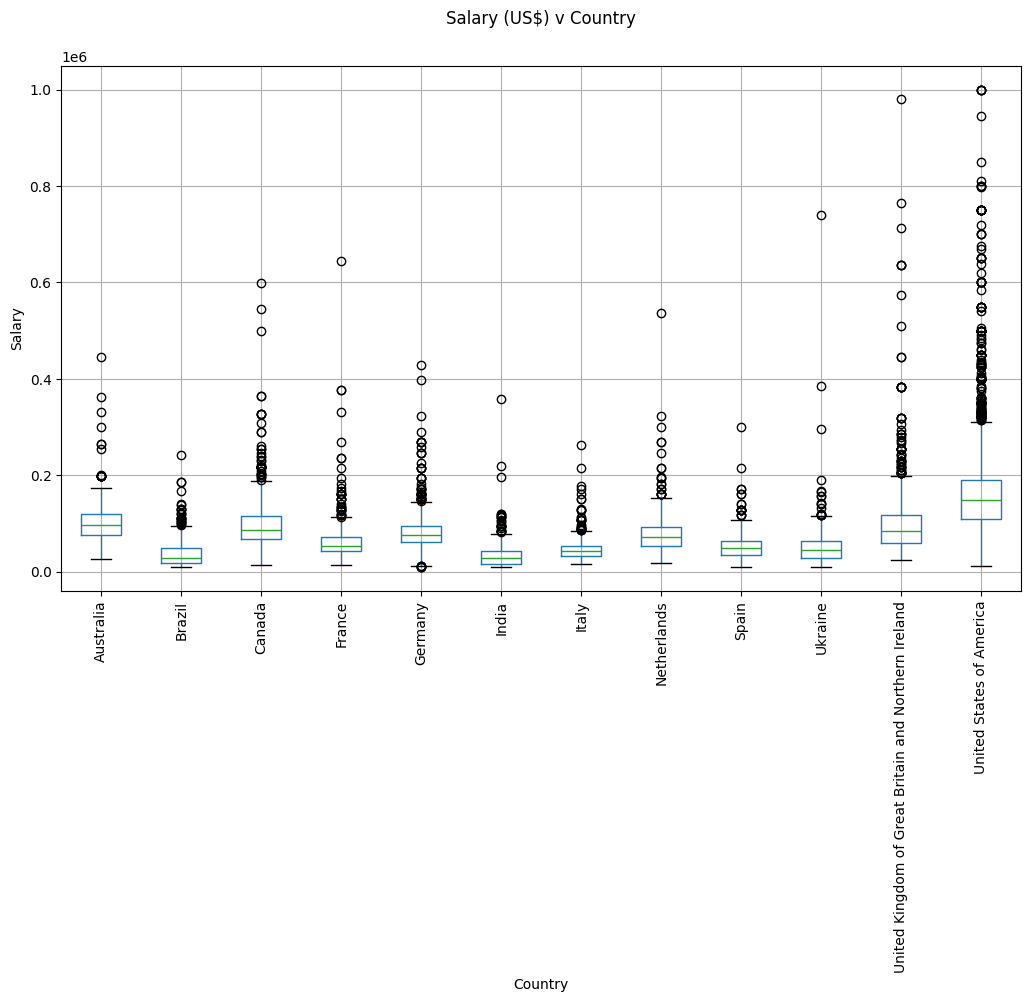

In [16]:
fig, ax= plt.subplots(1,1, figsize = (12,7))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [17]:
df['YearsCodePro'].unique()

array(['18', '25', '30', '50', '27', '1', '15', '11', '23', '17', '10',
       '8', '24', '12', '26', '40', '4', '9', '22', '28', '20', '16',
       '13', '19', '3', '35', '5', '31', '7', '41', '36', '6', '14',
       'Less than 1 year', '2', '38', '32', '21', '34', '29', '43', '33',
       '45', 'More than 50 years', '37', '44', '42', '39', '46', '49',
       '48', '47'], dtype=object)

In [18]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    elif x== 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)


In [19]:
df['EdLevel'].unique()

array(['Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

In [20]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [21]:
df["EdLevel"].unique()

array(['Post grad', 'Master’s degree', 'Less than a Bachelors',
       'Bachelor’s degree'], dtype=object)

In [22]:
#Label encoding of categorical column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
le_edu = LabelEncoder()
df['EdLevel'] = le_edu.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([3, 2, 1, 0])

In [24]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([10, 11,  3,  4,  2,  1,  6,  5,  9,  8,  7,  0])

In [25]:
# cat_cols = df.select_dtypes(include= ['object', 'category'])

# for i in cat_cols:
#     df[i] = df[[i]].apply(le.fit_transform)

# df['Country'].unique()

In [26]:
# df['EdLevel'].unique()

In [27]:
X = df.drop('Salary', axis = 1)
y = df['Salary']

In [28]:
#apply linear regression
from sklearn.linear_model import LinearRegression
linear_Reg = LinearRegression()
linear_Reg.fit(X, y.values)

LinearRegression()

In [29]:
y_pred = linear_Reg.predict(X)

In [30]:
#Score of regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error
error = np.sqrt(mean_squared_error(y, y_pred))
error

np.float64(73181.05059564003)

In [31]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state= 0)
dec_tree_reg.fit(X, y.values) 

DecisionTreeRegressor(random_state=0)

In [32]:
y_pred = dec_tree_reg.predict(X)
y_pred

array([113129.        , 106509.83333333, 151666.66666667, ...,
       172065.5       , 201153.84615385, 181011.51666667])

In [33]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$60,409.67


In [34]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state= 0)
random_forest_reg.fit(X, y.values) 

RandomForestRegressor(random_state=0)

In [35]:
y_pred = random_forest_reg.predict(X)

In [36]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$60,555.75


Hyperparamter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring= 'neg_mean_squared_error')
gs.fit(X, y.values)


GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [38]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$63,839.43


In [39]:
X

,Country,EdLevel,YearsCodePro
392,10,3,18.0
395,10,2,25.0
398,11,1,30.0
409,3,3,50.0
414,10,0,27.0
...,...,...,...
41163,11,0,2.0
41164,11,0,13.0
41167,11,1,25.0
41184,11,2,30.0


In [40]:
X = np.array([["United States of America", 'Master’s degree', 15 ]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [41]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_edu.transform(X[:,1])
X = X.astype(float)
X

array([[11.,  2., 15.]])

In [42]:
y_pred = regressor.predict(X)
y_pred

c:\Users\anuhc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([210462.80288462])

Saving the model

In [43]:
import pickle

In [47]:
da = {'model': regressor, 'le_country': le_country, 'le_education' : le_edu}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(da, file)

In [48]:
with open('saved_steps.pkl','rb') as file:
    da = pickle.load(file)

regressor_loaded = da['model']
le_country = da['le_country']
le_edu = da['le_education']

In [49]:
y_pred = regressor_loaded.predict(X)
y_pred

c:\Users\anuhc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([210462.80288462])